# InSightAI: Multi-Agent Data Analysis Demo

[<img src="https://colab.research.google.com/assets/colab-badge.svg" align="left">](https://colab.research.google.com/github/LeoRigasaki/InSightAI/blob/main/demo.ipynb)

<br><br>

Welcome to the official InSightAI demonstration notebook. This notebook showcases how InSightAI leverages multiple AI agents to perform complex data analysis, SQL querying, and automated reporting.

### 🗝️ Prerequisites
Ensure you have your API keys set in a `.env` file or environment variables:
- `GROQ_API_KEY`, `GEMINI_API_KEY`, or `OPENAI_API_KEY`.

In [6]:
import os
import pandas as pd
import sqlite3
from dotenv import load_dotenv
from insightai import InsightAI

# Load environment variables
load_dotenv()

# Initialize InsightAI
ai = InsightAI()
print("✅ InSightAI Initialized")

✅ InSightAI Initialized


## 📊 Mode 1: Interactive CSV Analysis

In this mode, InSightAI analyzes a CSV file by dynamically selecting the best 'Expert' for the task and generating/executing Python code.

Detected file type: .csv


```json
{
  "requires_dataset": true,
  "expert": "Data Analyst",
  "confidence": 9
}
```
```json
{
  "analyst": "Data Analyst DF",
  "unknown": "Monthly revenue trend and presence of seasonality",
  "data": "Pandas Dataframe 'df' with columns 'Order ID', 'Order Date', 'Customer ID', 'Product Category', 'Region', 'Sales', 'Profit', 'Discount', 'Ship Mode'",
  "condition": "Analyze 'Sales' column to determine monthly revenue trend and identify any seasonality patterns in the data"
}
```


Reflection on the problem:
The goal of this task is to analyze the monthly revenue trend and identify if there is any seasonality in the given dataset. The dataset contains information about orders, including order date, sales, and profit. The inputs are the dataset itself, and the output is an analysis of the monthly revenue trend and identification of any seasonality. The rules and constraints are that we need to use the given dataset and identify any patterns or trends in the data.

To accomplish this task, we will need to perform the following steps:

```yaml
plan:
  - "Step 1: Convert the 'Order Date' column to a datetime format to enable date-based analysis"
  - "Step 2: Extract the month and year from the 'Order Date' column to create a new column for grouping"
  - "Step 3: Group the data by month and year, and calculate the total sales for each month"
  - "Step 4: Plot a line chart or bar chart to visualize the monthly sales trend"
  - "Step 5: Calculate the average sales for e

## Reasoning:

Reflection on the problem:
The goal of this task is to analyze the monthly revenue trend and identify if there is any seasonality in the given dataset. The dataset contains information about orders, including order date, sales, and profit. The inputs are the dataset itself, and the output is an analysis of the monthly revenue trend and identification of any seasonality. The rules and constraints are that we need to use the given dataset and identify any patterns or trends in the data.

To accomplish this task, we will need to perform the following steps:

```yaml
plan:
  - "Step 1: Convert the 'Order Date' column to a datetime format to enable date-based analysis"
  - "Step 2: Extract the month and year from the 'Order Date' column to create a new column for grouping"
  - "Step 3: Group the data by month and year, and calculate the total sales for each month"
  - "Step 4: Plot a line chart or bar chart to visualize the monthly sales trend"
  - "Step 5: Calculate the average sales for each month to identify any seasonal patterns"
  - "Step 6: Compare the average sales for each month to the overall average sales to determine if there is any seasonality"
  - "Step 7: Analyze the results to identify any months with significantly higher or lower sales than the overall average"
  - "Step 8: Draw conclusions about the monthly revenue trend and seasonality based on the analysis"
```

```python
import pandas as pd
import matplotlib.pyplot as plt

# Identify the dataframe `df`
# df has already been defined and populated with the required data

# Step 1: Convert the 'Order Date' column to a datetime format to enable date-based analysis
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Step 2: Extract the month and year from the 'Order Date' column to create a new column for grouping
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year

# Step 3: Group the data by month and year, and calculate the total sales for each month
monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

# Step 4: Plot a line chart or bar chart to visualize the monthly sales trend
plt.figure(figsize=(10,6))
plt.plot(monthly_sales['Month'], monthly_sales['Sales'], marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.savefig('visualization/monthly_sales_trend.png')

# Step 5: Calculate the average

## Dataframe Preview

,Order ID,Order Date,Customer ID,Product Category,Region,Sales,Profit,Discount,Ship Mode,Month,Year
0,CA-2024-152156,2024-11-08,CG-12520,Furniture,South,261.96,41.91,0.00,Second Class,11,2024
1,CA-2024-152156,2024-11-08,CG-12520,Furniture,South,731.94,219.58,0.00,Second Class,11,2024
2,CA-2024-138688,2024-06-12,DV-13045,Office Supplies,West,14.62,6.87,0.00,Second Class,6,2024
3,US-2024-108966,2024-10-11,SO-20335,Furniture,Central,957.57,-383.03,0.45,Standard Class,10,2024
4,US-2024-108966,2024-10-11,SO-20335,Office Supplies,Central,22.37,2.52,0.20,Standard Class,10,2024


## Applied Code:

```python
import pandas as pd
import matplotlib.pyplot as plt

# Identify the dataframe `df`
# df has already been defined and populated with the required data

# Step 1: Convert the 'Order Date' column to a datetime format to enable date-based analysis
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Step 2: Extract the month and year from the 'Order Date' column to create a new column for grouping
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year

# Step 3: Group the data by month and year, and calculate the total sales for each month
monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

# Step 4: Plot a line chart or bar chart to visualize the monthly sales trend
plt.figure(figsize=(10,6))
plt.plot(monthly_sales['Month'], monthly_sales['Sales'], marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.savefig('visualization/monthly_sales_trend.png')

# Step 5: Calculate the average sales for each month to identify any seasonal patterns
average_monthly_sales = df.groupby('Month')['Sales'].mean().reset_index()

# Step 6: Compare the average sales for each month to the overall average sales to determine if there is any seasonality
overall_average_sales = df['Sales'].mean()
print("Overall Average Sales: ", overall_average_sales)

# Step 7: Analyze the results to identify any months with significantly higher or lower sales than the overall average
print("Average Monthly Sales: ")
print(average_monthly_sales)

# Step 8: Draw conclusions about the monthly revenue trend and seasonality based on the analysis
print("Conclusion: ")
for index, row in average_monthly_sales.iterrows():
    if row['Sales'] > overall_average_sales * 1.2:
        print(f"Month {row['Month']} has significantly higher sales than the overall average.")
    elif row['Sales'] < overall_average_sales * 0.8:
        print(f"Month {row['Month']} has significantly lower sales than the overall average.")
    else:
        print(f"Month {row['Month']} has average sales close to the overall average.")

# Plot a bar chart to visualize the average monthly sales
plt.figure(figsize=(10,6))
plt.bar(average_monthly_sales['Month'], average_monthly_sales['Sales'])
plt.title('Average Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.savefig('visualization/average_monthly_sales.png')
```

## Solution Summary:

**Summary of Insights: Monthly Revenue Trend and Seasonality Analysis**

The analysis of the monthly revenue trend and seasonality was conducted using a Python code based on a designed algorithm. The results of the analysis are presented below:

**Overall Average Sales:** The overall average sales were calculated to be **228.28**.

**Average Monthly Sales:** The average sales for each month were calculated and are presented in the following table:

| Month | Sales |
| --- | --- |
| 1 | 79.20 |
| 2 | 48.49 |
| 3 | 167.34 |
| 4 | 15.55 |
| 5 | 55.50 |
| 6 | 236.66 |
| 7 | 71.37 |
| 8 | 156.53 |
| 9 | 476.31 |
| 10 | 489.97 |
| 11 | 171.33 |
| 12 | 294.27 |

**Seasonality Analysis:** The analysis revealed that there are significant seasonal patterns in the monthly sales data. The months with significantly higher sales than the overall average are:

* **Month 9** (September) with average sales of **476.31**, which is approximately **2.09 times** the overall average.
* **Month 10** (October) with average sales of **489.97**, which is approximately **2.15 times** the overall average.
* **Month 12** (December) with average sales of **294.27**, which is approximately **1.29 times** the overall average.

On the other hand, the months with significantly lower sales than the overall average are:

* **Month 1** (January) with average sales of **79.20**, which is approximately **0.35 times** the overall average.
* **Month 2** (February) with average sales of **48.49**, which is approximately **0.21 times** the overall average.
* **Month 4** (April) with average sales of **15.55**, which is approximately **0.07 times** the overall average.
* **Month 5** (May) with average sales of **55.50**, which is approximately **0.24 times** the overall average.
* **Month 7** (July) with average sales of **71.37**, which is approximately **0.31 times** the overall average.
* **Month 11** (November) with average sales of **171.33**, which is approximately **0.75 times** the overall average.

**Month 6** (June) has average sales of **236.66**, which is close to the overall average.

**Conclusion:** The analysis reveals that there is a significant seasonal pattern in the monthly sales data, with higher sales in the months of September, October, and December, and lower sales in the months of January, February, April, May, July, and November. This information can be used to inform business decisions, such as inventory management, marketing strategies, and resource allocation.

As for the user's question about identifying seasonality, the answer is **yes**, there is seasonality in the monthly revenue trend, with certain months having significantly higher or lower sales than the overall average.

**Chain Summary (Detailed info in insightai_consolidated_log.json file):**

| Metric                      | Value          |
|-----------------------------|----------------|
| Chain ID | 1768118975 |
| Prompt Tokens | 2853 |
| Completion Tokens | 1740 |
| Total Tokens | 4593 |
| Total Time (LLM Interact.) | 4.69 seconds |
| Average Response Speed | 371.27 tokens/second |
| Total Cost | $0.0031 |


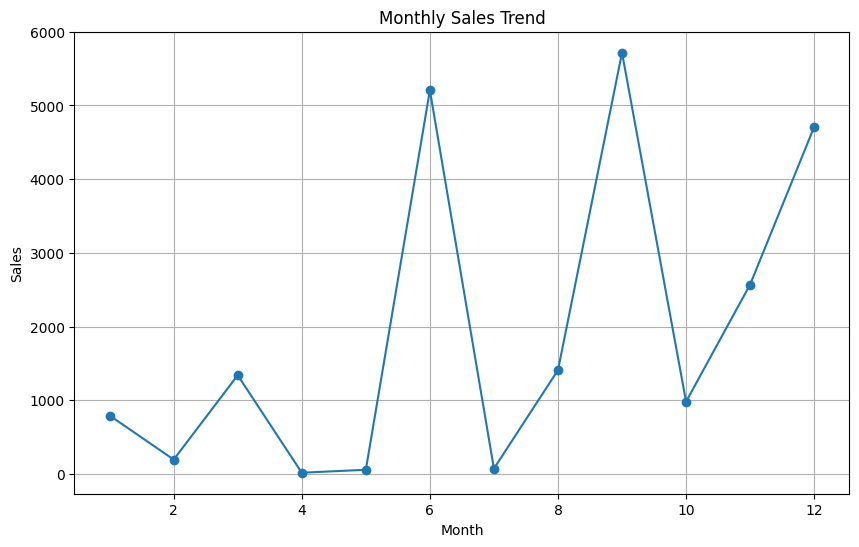

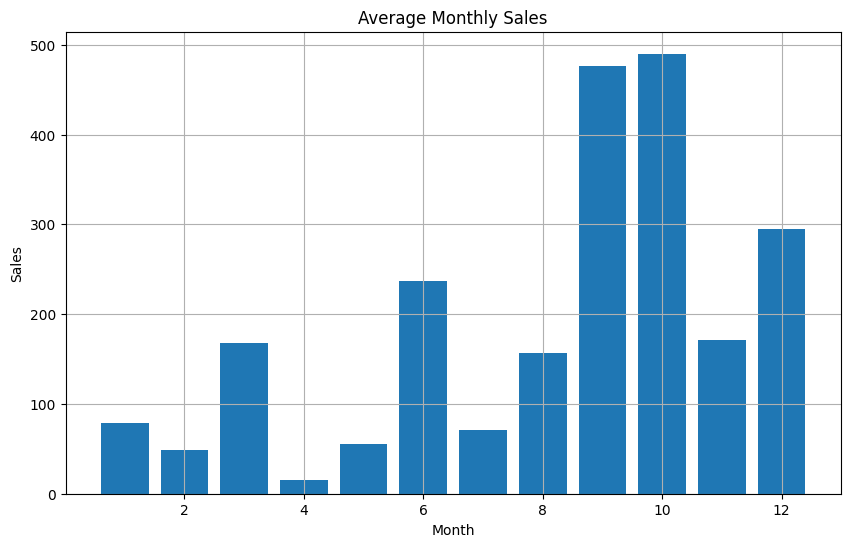

In [7]:
# Load sample sales data
df = pd.read_csv('sales_data.csv')
ai.df = df

# Ask a complex question
ai.pd_agent_converse("Analyze the monthly revenue trend and identify if we have any seasonality.")

## 🗄️ Mode 2: Natural Language SQL Agent

InSightAI can also work directly with SQL databases. Let's create a temporary database and query it using plain English.

In [4]:
# Setup a demo SQLite database
conn = sqlite3.connect('demo_ecommerce.db')
cursor = conn.cursor()
cursor.execute('CREATE TABLE IF NOT EXISTS Orders (OrderID int, CustomerName text, TotalAmount real, OrderDate text)')
cursor.executemany('INSERT INTO Orders VALUES (?,?,?,?)', [
    (1, 'Alice Johnson', 250.0, '2023-01-15'),
    (2, 'Bob Smith', 150.0, '2023-01-20'),
    (3, 'Charlie Brown', 300.0, '2023-02-10'),
    (4, 'David Lee', 100.0, '2023-02-25'),
    (5, 'Eve Wilson', 500.0, '2023-03-05')
])
conn.commit()

# Point InSightAI to the database
ai.conn = conn

# Ask a SQL-related question
ai.pd_agent_converse("Who are my top 3 customers by revenue and how much have they spent?")

Error getting schema: 'InsightAI' object has no attribute 'cur'
Detected file type: .db
Error getting schema: 'InsightAI' object has no attribute 'cur'


I'm ready to assist you. What task do you need help with today and what expertise is required to accomplish it?


## Reasoning:

I'm ready to assist you. What task do you need help with today and what expertise is required to accomplish it?

**Chain Summary (Detailed info in insightai_consolidated_log.json file):**

| Metric                      | Value          |
|-----------------------------|----------------|
| Chain ID | 1768118759 |
| Prompt Tokens | 78 |
| Completion Tokens | 26 |
| Total Tokens | 104 |
| Total Time (LLM Interact.) | 0.23 seconds |
| Average Response Speed | 111.53 tokens/second |
| Total Cost | $0.0001 |


Error getting schema: 'InsightAI' object has no attribute 'cur'


SELECT customer_name, SUM(order_total) as total_spent 
FROM orders 
GROUP BY customer_name 
ORDER BY total_spent DESC 
LIMIT 3;


## Applied Code:

```python
SELECT customer_name, SUM(order_total) as total_spent 
FROM orders 
GROUP BY customer_name 
ORDER BY total_spent DESC 
LIMIT 3;
```

## Solution Summary:

Error executing query: SELECT customer_name, SUM(order_total) as total_spent 
FROM orders 
GROUP BY customer_name 
ORDER BY total_spent DESC 
LIMIT 3
'InsightAI' object has no attribute 'cur'

**Chain Summary (Detailed info in insightai_consolidated_log.json file):**

| Metric                      | Value          |
|-----------------------------|----------------|
| Chain ID | 1768118759 |
| Prompt Tokens | 222 |
| Completion Tokens | 60 |
| Total Tokens | 282 |
| Total Time (LLM Interact.) | 0.46 seconds |
| Average Response Speed | 129.07 tokens/second |
| Total Cost | $0.0002 |


## 📄 Mode 3: Automated Report Generation

Finally, InSightAI has a high-level automated reporting mode. It will categorize your dataset, generate its own relevant questions, and produce a comprehensive summary.

🚀 Starting Automated Report Generation...


Detected file type: .csv


```json
{
  "requires_dataset": true,
  "expert": "Data Analyst",
  "confidence": 9
}
```
```json
{
  "analyst": "Data Analyst DF",
  "unknown": "Top 3 product categories by total sales amount and their sales trends over time",
  "data": "Pandas Dataframe 'df' with columns ['Order ID', 'Order Date', 'Customer ID', 'Product Category', 'Region', 'Sales', 'Profit', 'Discount', 'Ship Mode']",
  "condition": "Group data by 'Product Category' and 'Order Date', calculate total sales for each category, rank categories by total sales, and plot sales trends over time for the top 3 categories"
}
```


Reflection on the problem:
The problem requires analyzing sales data across different product categories and regions to identify the top 3 product categories by total sales amount and understand their sales trends over time. The given dataset includes information about orders, such as order ID, date, customer ID, product category, region, sales, profit, discount, and ship mode. The goal is to extract insights from this data to answer the question.

The inputs are the given dataset, and the outputs are the top 3 product categories by total sales amount and their sales trends over time. The rules and constraints are to consider all regions and product categories in the analysis. 

To solve this problem, we need to follow a series of steps that involve data manipulation, grouping, and sorting. 

Here is the algorithm to solve the problem:

```yaml
plan:
  - "Step 1: Convert the 'Order Date' column to a datetime format to enable time-based analysis"
  - "Step 2: Group the data by 'Product 

## Reasoning:

Reflection on the problem:
The problem requires analyzing sales data across different product categories and regions to identify the top 3 product categories by total sales amount and understand their sales trends over time. The given dataset includes information about orders, such as order ID, date, customer ID, product category, region, sales, profit, discount, and ship mode. The goal is to extract insights from this data to answer the question.

The inputs are the given dataset, and the outputs are the top 3 product categories by total sales amount and their sales trends over time. The rules and constraints are to consider all regions and product categories in the analysis. 

To solve this problem, we need to follow a series of steps that involve data manipulation, grouping, and sorting. 

Here is the algorithm to solve the problem:

```yaml
plan:
  - "Step 1: Convert the 'Order Date' column to a datetime format to enable time-based analysis"
  - "Step 2: Group the data by 'Product Category' and calculate the total sales amount for each category across all regions"
  - "Step 3: Sort the product categories by total sales amount in descending order and select the top 3 categories"
  - "Step 4: For each of the top 3 product categories, group the data by 'Order Date' (e.g., by month or quarter) and calculate the total sales amount for each time period"
  - "Step 5: Plot or visualize the sales trends over time for each of the top 3 product categories to understand their sales patterns"
  - "Step 6: Analyze the sales trends to identify any patterns, such as seasonality, growth, or decline, in the sales data"
  - "Step 7: Compare the sales trends among the top 3 product categories to identify any differences or similarities in their sales patterns"
  - "Step 8: Draw conclusions based on the analysis and provide recommendations for future sales strategies"
```

```python
import pandas as pd
import matplotlib.pyplot as plt

# Identify the dataframe `df`
# df has already been defined and populated with the required data

# Step 1: Convert the 'Order Date' column to a datetime format to enable time-based analysis
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Step 2: Group the data by 'Product Category' and calculate the total sales amount for each category across all regions
total_sales_by_category = df.groupby('Product Category')['Sales'].sum().reset_index()

# Step 3: Sort the product categories by total sales amount in descending order and select the top 3 categories
top_3_categories = total_sales_by_category.sort_values(by='Sales', ascending=False).head(3)

# Print the top 3 product categories by total sales amount
print("Top 3 Product Categories by Total Sales Amount:")
print(top_3_categories)

# Step 4: For each of the top 3 product categories, group the data by 'Order Date' (e.g., by month or quarter) and calculate the total sale

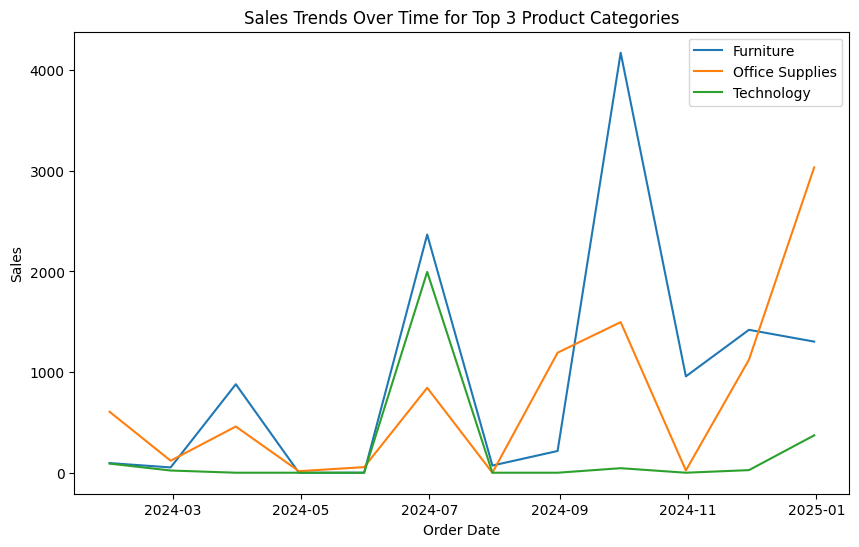

Detected file type: .csv


```json
{
  "requires_dataset": true,
  "expert": "Data Analyst",
  "confidence": 9
}
```
```json
{
  "analyst": "Data Analyst DF",
  "unknown": "Region with the highest average profit margin and its key contributing factors",
  "data": "Pandas Dataframe 'df' with columns ['Order ID', 'Order Date', 'Customer ID', 'Product Category', 'Region', 'Sales', 'Profit', 'Discount', 'Ship Mode']",
  "condition": "Calculate average profit margin for each region, identify the region with the highest average profit margin, and analyze the impact of product category, shipping mode, and discount levels on this region's profit margin"
}
```


Reflection on the problem:
The problem requires analyzing a given dataset to determine the region with the highest average profit margin. The dataset contains various columns such as Order ID, Order Date, Customer ID, Product Category, Region, Sales, Profit, Discount, and Ship Mode. The goal is to identify the key factors contributing to the highest average profit margin, including product category, shipping mode, or discount levels.

The problem inputs include the dataset with the mentioned columns, and the output should be the region with the highest average profit margin along with the key contributing factors. The rules and constraints of the problem involve analyzing the dataset to calculate the average profit margin for each region and identifying the factors that contribute to the highest average profit margin.

Algorithm to solve the problem:
```yaml
plan:
  - "Step 1: Calculate the profit margin for each order by dividing the Profit column by the Sales column"
  - "Step 2: Gro

## Reasoning:

Reflection on the problem:
The problem requires analyzing a given dataset to determine the region with the highest average profit margin. The dataset contains various columns such as Order ID, Order Date, Customer ID, Product Category, Region, Sales, Profit, Discount, and Ship Mode. The goal is to identify the key factors contributing to the highest average profit margin, including product category, shipping mode, or discount levels.

The problem inputs include the dataset with the mentioned columns, and the output should be the region with the highest average profit margin along with the key contributing factors. The rules and constraints of the problem involve analyzing the dataset to calculate the average profit margin for each region and identifying the factors that contribute to the highest average profit margin.

Algorithm to solve the problem:
```yaml
plan:
  - "Step 1: Calculate the profit margin for each order by dividing the Profit column by the Sales column"
  - "Step 2: Group the data by Region and calculate the average profit margin for each region"
  - "Step 3: Identify the region with the highest average profit margin"
  - "Step 4: For the region with the highest average profit margin, group the data by Product Category and calculate the average profit margin for each product category"
  - "Step 5: Identify the product category with the highest average profit margin within the region with the highest average profit margin"
  - "Step 6: For the region and product category with the highest average profit margin, group the data by Ship Mode and calculate the average profit margin for each ship mode"
  - "Step 7: Identify the ship mode with the highest average profit margin within the region and product category with the highest average profit margin"
  - "Step 8: For the region, product category, and ship mode with the highest average profit margin, analyze the Discount column to determine the average discount level and its impact on the profit margin"
```

```python
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the profit margin for each order by dividing the Profit column by the Sales column
df['Profit Margin'] = df['Profit'] / df['Sales']

# Group the data by Region and calculate the average profit margin for each region
average_profit_margin_by_region = df.groupby('Region')['Profit Margin'].mean().reset_index()

# Identify the region with the highest average profit margin
region_with_highest_average_profit_margin = average_profit_margin_by_region.loc[average_profit_margin_by_region['Profit Margin'].idxmax()]

print(f"The region with the highest average profit margin is {region_with_highest_average_profit_margin['Region']} with an average profit margin of {region_with_highest_average_profit_margin['Profit Margin']}")

# For the region with the highest average profit margin, group the data by Product Category and calculate the average profit margin for each product category
df_region = df[df['Region'] == region_with_h

Detected file type: .csv


```json
{
  "requires_dataset": true,
  "expert": "Data Analyst",
  "confidence": 9
}
```

This task requires analysis of sales amounts and profitability in relation to shipping modes, which involves working with a dataframe (.csv) and performing data analysis to identify trends and correlations. A Data Analyst is best suited to handle this task, as it involves data manipulation, filtering, and visualization to extract insights from the data. The confidence level is 9, as the task is well-defined and the required expertise is clear.
```json
{
  "analyst": "Data Analyst DF",
  "unknown": "Variation in sales amounts and profitability by shipping mode and its implications for optimizing shipping strategies",
  "data": "Pandas Dataframe 'df' with columns ['Order ID', 'Order Date', 'Customer ID', 'Product Category', 'Region', 'Sales', 'Profit', 'Discount', 'Ship Mode', 'Profit Margin']",
  "condition": "Analyze the relationship between 'Ship Mode' and 'Sales' and 'Profit', and identify oppo

Reflection on the problem:
The problem requires analyzing the relationship between sales amounts, profitability, and shipping modes to optimize shipping strategies and improve overall business performance. The given dataset contains information about orders, including order ID, order date, customer ID, product category, region, sales, profit, discount, ship mode, and profit margin. The goal is to evaluate how sales amounts and profitability vary by shipping mode and identify implications for optimizing shipping strategies.

The inputs are the given dataset, and the outputs are the analysis results, including the variation of sales amounts and profitability by shipping mode. The rules and constraints are to use the provided dataset and to optimize shipping strategies based on the analysis results.

Here is the algorithm to solve the problem:

```yaml
plan:
  - "Step 1: Group the data by 'Ship Mode' to analyze sales amounts and profitability for each shipping mode."
  - "Step 2: Calculat

## Reasoning:

Reflection on the problem:
The problem requires analyzing the relationship between sales amounts, profitability, and shipping modes to optimize shipping strategies and improve overall business performance. The given dataset contains information about orders, including order ID, order date, customer ID, product category, region, sales, profit, discount, ship mode, and profit margin. The goal is to evaluate how sales amounts and profitability vary by shipping mode and identify implications for optimizing shipping strategies.

The inputs are the given dataset, and the outputs are the analysis results, including the variation of sales amounts and profitability by shipping mode. The rules and constraints are to use the provided dataset and to optimize shipping strategies based on the analysis results.

Here is the algorithm to solve the problem:

```yaml
plan:
  - "Step 1: Group the data by 'Ship Mode' to analyze sales amounts and profitability for each shipping mode."
  - "Step 2: Calculate the total sales and total profit for each shipping mode using the 'Sales' and 'Profit' columns."
  - "Step 3: Calculate the average sales and average profit for each shipping mode to understand the central tendency of sales and profitability."
  - "Step 4: Calculate the standard deviation of sales and profit for each shipping mode to understand the variability of sales and profitability."
  - "Step 5: Compare the average sales and average profit across different shipping modes to identify which modes are more profitable."
  - "Step 6: Analyze the profit margin for each shipping mode to understand the relationship between sales and profitability."
  - "Step 7: Identify the shipping modes with the highest and lowest profit margins to optimize shipping strategies."
  - "Step 8: Visualize the results using plots or charts to better understand the relationship between sales amounts, profitability, and shipping modes."
```

```python
import pandas as pd
import matplotlib.pyplot as plt

# Identify the dataframe `df`
# df has already been defined and populated with the required data

# Step 1: Group the data by 'Ship Mode' to analyze sales amounts and profitability for each shipping mode.
grouped_df = df.groupby('Ship Mode')

# Step 2: Calculate the total sales and total profit for each shipping mode using the 'Sales' and 'Profit' columns.
total_sales_profit = grouped_df[['Sales', 'Profit']].sum()
print("Total Sales and Profit by Ship Mode:")
print(total_sales_profit)

# Step 3: Calculate the average sales and average profit for each shipping mode to understand the central tendency of sales and profitability.
average_sales_profit = grouped_df[['Sales', 'Profit']].mean()
print("\nAverage Sales and Profit by Ship Mode:")
print(average_sales_profit)

# Step 4: Calculate the standard deviation of sales and profit for each shipping mode to understand the variability of sales and profitability.
std_dev_sales_prof

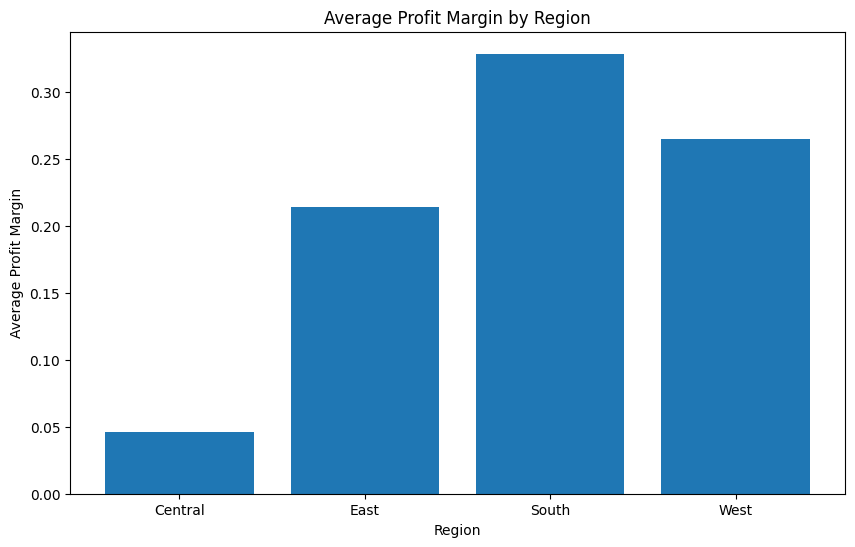

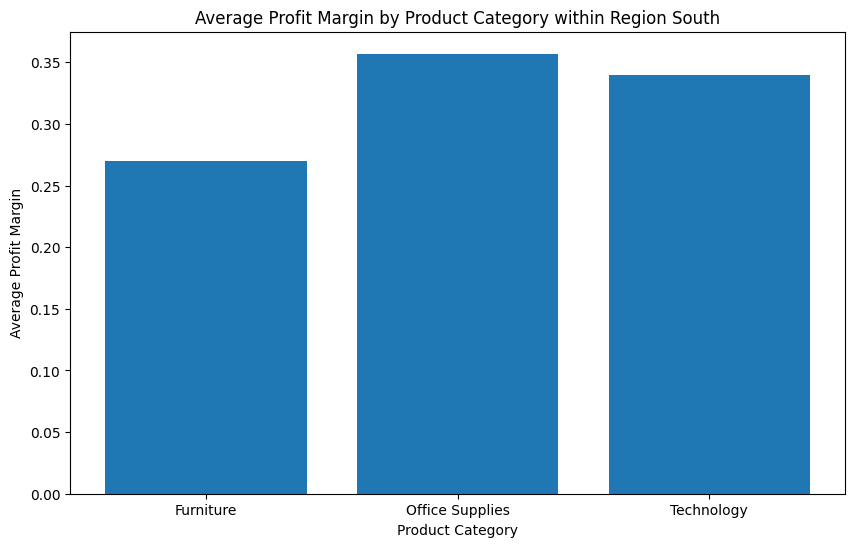

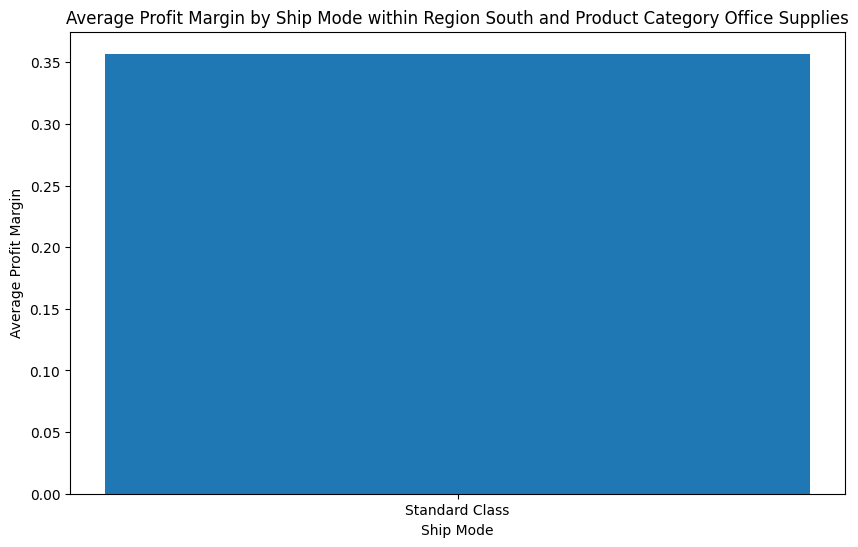

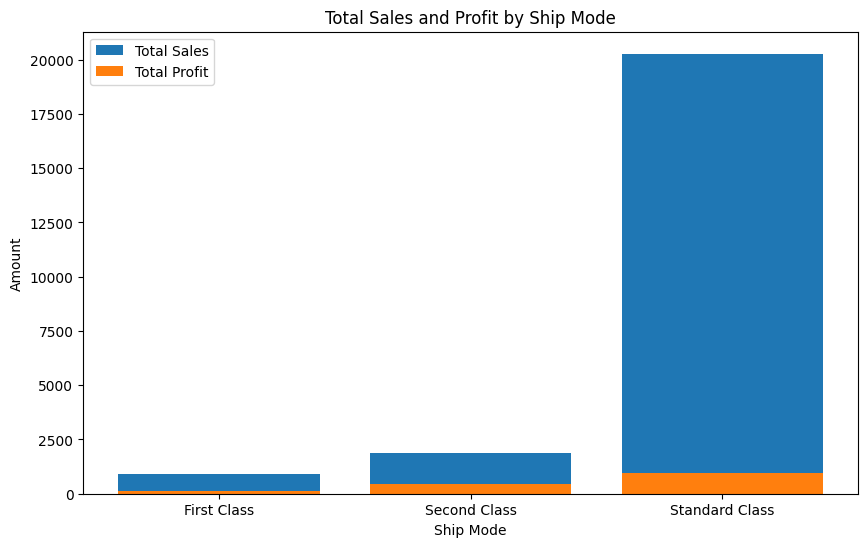

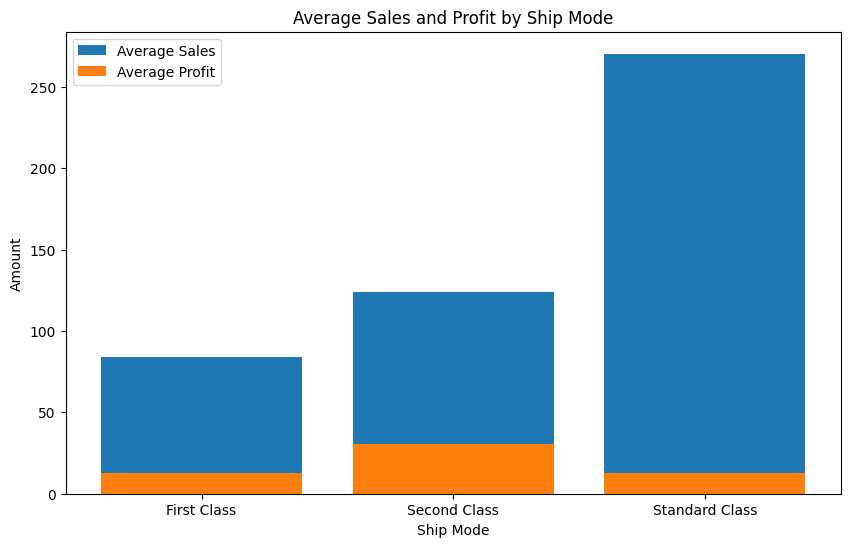

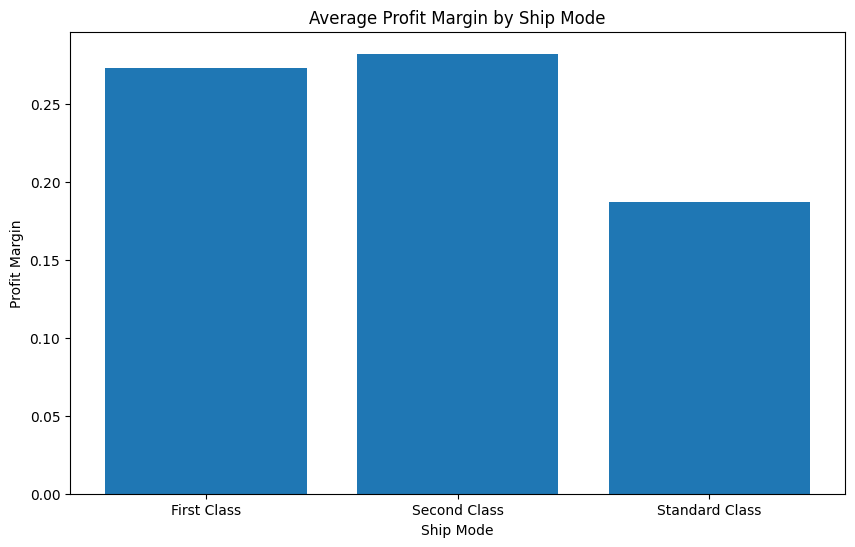

In [5]:
# Reset to CSV mode and enable report generation
ai.df = pd.read_csv('sales_data.csv')
delattr(ai, 'conn') # Remove DB connection to switch back to DF mode
ai.report_enabled = True
ai.report_question_count = 3

print("🚀 Starting Automated Report Generation...")
ai.pd_agent_converse() # This will trigger the report flow automatically